## 1. Loading required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Mexico gourvement loading Covid 19 dataset

In [2]:
file_path = "/home/mael/Covid_19_ML_Project/c19mlp/covid_dataset/covid.csv"
file_path

'/home/mael/Covid_19_ML_Project/c19mlp/covid_dataset/covid.csv'

In [3]:
#loading of with the NA figures in the dataset
covid_pp = pd.read_csv(file_path,sep=',', na_values=[97,98,99])

In [4]:
covid_pp_df= covid_pp.copy()

In [5]:
covid_pp_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0


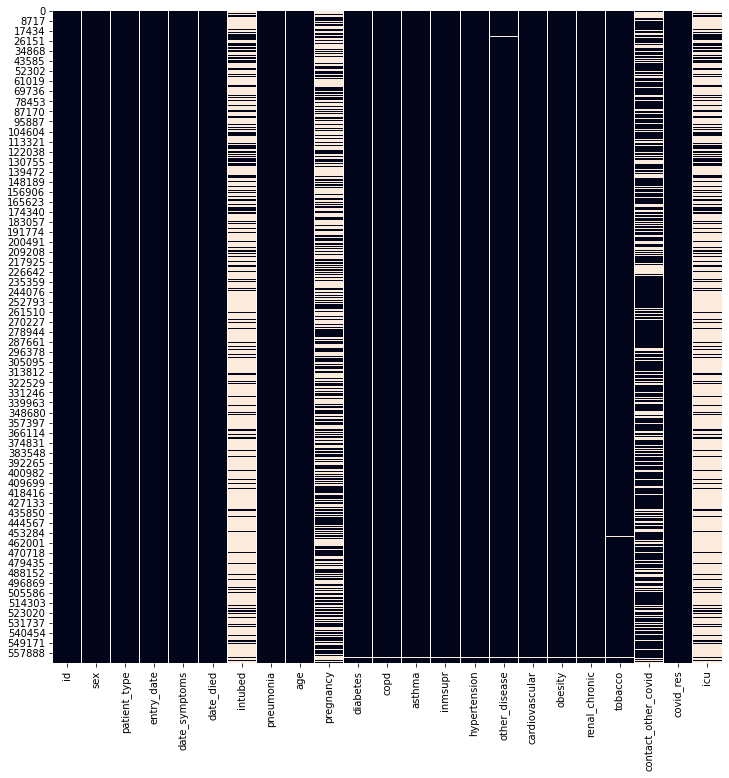

In [6]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(covid_pp_df.isna(), cbar=False)

In [7]:
(covid_pp_df.isna().sum()/covid_pp_df.shape[0]).sort_values(ascending=False)

icu                    0.785055
intubed                0.785054
pregnancy              0.509527
contact_other_covid    0.308913
other_disease          0.004585
diabetes               0.003496
inmsupr                0.003495
tobacco                0.003366
hypertension           0.003219
cardiovascular         0.003216
renal_chronic          0.003163
obesity                0.003143
asthma                 0.003092
copd                   0.003087
age                    0.000365
pneumonia              0.000019
id                     0.000005
covid_res              0.000000
date_died              0.000000
date_symptoms          0.000000
entry_date             0.000000
patient_type           0.000000
sex                    0.000000
dtype: float64

In [8]:
covid_pp_df.shape

(566602, 23)

In [9]:
covid_pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   566599 non-null  object 
 1   sex                  566602 non-null  int64  
 2   patient_type         566602 non-null  int64  
 3   entry_date           566602 non-null  object 
 4   date_symptoms        566602 non-null  object 
 5   date_died            566602 non-null  object 
 6   intubed              121789 non-null  float64
 7   pneumonia            566591 non-null  float64
 8   age                  566395 non-null  float64
 9   pregnancy            277903 non-null  float64
 10  diabetes             564621 non-null  float64
 11  copd                 564853 non-null  float64
 12  asthma               564850 non-null  float64
 13  inmsupr              564622 non-null  float64
 14  hypertension         564778 non-null  float64
 15  other_disease    

⚠️ **During the EDA, we indentify only "date_died" feature useful for our case, to conclude we will drop the others type object features**

In [10]:
covid_pp_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0


## 3.1 Pre - Processing Raw dataset "covid_pp_df

**objective:** 
- perform some feature engineering/encoding/imputation to improve the efficiency feature management from the raw dataset
- perform performance analysis beteween feature engineering/model's refrence prediction   

## 3.2 TrainTest - tagets balancing check - features Engineering / Encoding / Imputing - Pre-processing

In [11]:
#import machine learning library
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report,precision_recall_curve, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_selector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn. decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from lightgbm import LGBMClassifier

- **Train/Test split**

In [12]:
#split of the dataset in a trainset and a testset 'size=20%' 
trainset, testset = train_test_split(covid_pp_df, test_size= 0.2, random_state=0)

- **Train/Test tagets balancing check**

In [13]:
trainset["covid_res"].value_counts(normalize=True)*100

2    49.228624
1    38.954203
3    11.817173
Name: covid_res, dtype: float64

In [14]:
testset["covid_res"].value_counts(normalize=True)*100

2    49.320956
1    38.902763
3    11.776282
Name: covid_res, dtype: float64

- **features engineering**

In [15]:
def feature_engineering (df):
    df['patient_died']=df['date_died'].map({'9999-99-99':0})
    df['patient_died']=df['patient_died'].fillna(1)
    df = df[df["covid_res"]!= 3]
    df['pregnancy']= df['pregnancy'].fillna(2)
    disease_columns= ["diabetes","copd","asthma","inmsupr",
                      "hypertension","cardiovascular","obesity","renal_chronic"]
    df["< 1 disease"] = np.sum(covid_pp_df[disease_columns]== 1, axis= 1)>1
    
    return df

- **features encoding**

In [16]:
def encoding (df):
    categorical_features =['sex', 'patient_type', 'intubed',
                           'pneumonia', 'pregnancy', 'diabetes',
                           'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
                           'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
                           'covid_res', 'icu','patient_died','< 1 disease']
    df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
    return df

- **features imputation**

In [17]:
def imputation(df):
    features_to_drop =['id','entry_date','date_symptoms','date_died']
    df = df.drop(features_to_drop,axis=1)
    
    df = df.dropna(axis=0)
    df = df.drop_duplicates(keep='first')
    
    #print(df)
    return df

- **target varialble smoting** 

In [18]:
smote = SMOTE()

In [19]:
def smoting(X,y):
    print(y.value_counts(normalize=True)*100)
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    X, y =smote.fit_sample(X,y)
    print(y.value_counts(normalize=True)*100)
    print("X.shape:",X.shape,"y.shape:",y.shape)
    print("\n -------------------- \n")
    return X,y

- **Pre-processing**

In [20]:
def pre_processing (df):
    df = feature_engineering(df)
    df = encoding (df)
    df = imputation(df)
    X = df.drop("covid_res_2",axis =1)
    y = df["covid_res_2"]
   
    print ('befor SMOTE:', Counter(y))
    X_smote, y_smote = smoting(X,y)
    print("\n --XXXX------------------ \n")
    print ('afetr SMOTE:', Counter(y_smote))
    print("X_smote.shape:",X_smote.shape,"y_smote.shape:",y_smote.shape)
    print("\n -------------------- \n")
    #print(pd.DataFrame(X).head())
    #print("\n -------------------- \n")
    #print(y.to_frame().head())
    return X_smote, y_smote

## 3.3 performance analysis feature engineering/ model's refrence prediction

In [21]:
model = DecisionTreeClassifier(random_state=0)

In [22]:
model_1 = make_pipeline(SelectKBest(f_classif,k=20),DecisionTreeClassifier(random_state=0))

In [23]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif,k=20),DecisionTreeClassifier(random_state=0))

- **model metric evaluation**

In [24]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv= 4,scoring= 'f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()
    #plt.savefig('list_of_models = [RandomForest, AdaBoost, SVM, KNN] evalustion.png')

In [25]:
X_train, y_train = pre_processing(trainset)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is try

befor SMOTE: Counter({0: 32925, 1: 29033})
0    53.140837
1    46.859163
Name: covid_res_2, dtype: float64
X.shape: (61958, 20) y.shape: (61958,)

 -------------------- 

1    50.0
0    50.0
Name: covid_res_2, dtype: float64
X.shape: (65850, 20) y.shape: (65850,)

 -------------------- 


 --XXXX------------------ 

afetr SMOTE: Counter({1: 32925, 0: 32925})
X_smote.shape: (65850, 20) y_smote.shape: (65850,)

 -------------------- 



In [26]:
X_test, y_test = pre_processing(testset)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is try

befor SMOTE: Counter({0: 13159, 1: 11410})
0    53.559363
1    46.440637
Name: covid_res_2, dtype: float64
X.shape: (24569, 20) y.shape: (24569,)

 -------------------- 

1    50.0
0    50.0
Name: covid_res_2, dtype: float64
X.shape: (26318, 20) y.shape: (26318,)

 -------------------- 


 --XXXX------------------ 

afetr SMOTE: Counter({0: 13159, 1: 13159})
X_smote.shape: (26318, 20) y_smote.shape: (26318,)

 -------------------- 



[[10257  2902]
 [ 9105  4054]]
              precision    recall  f1-score   support

           0       0.53      0.78      0.63     13159
           1       0.58      0.31      0.40     13159

    accuracy                           0.54     26318
   macro avg       0.56      0.54      0.52     26318
weighted avg       0.56      0.54      0.52     26318



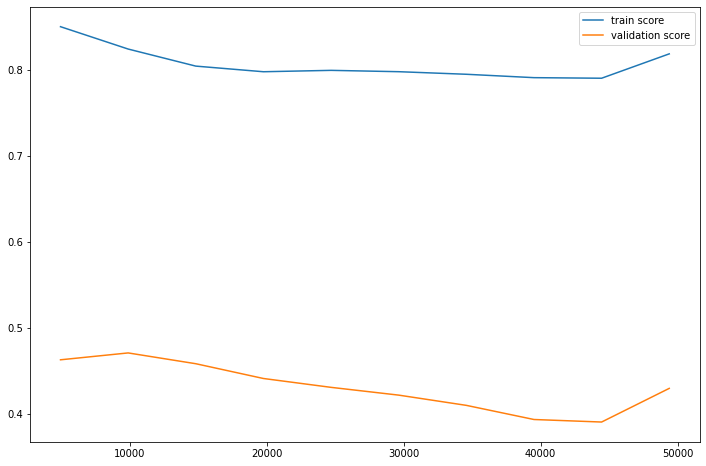

In [27]:
evaluation(model)

[[10257  2902]
 [ 9105  4054]]
              precision    recall  f1-score   support

           0       0.53      0.78      0.63     13159
           1       0.58      0.31      0.40     13159

    accuracy                           0.54     26318
   macro avg       0.56      0.54      0.52     26318
weighted avg       0.56      0.54      0.52     26318



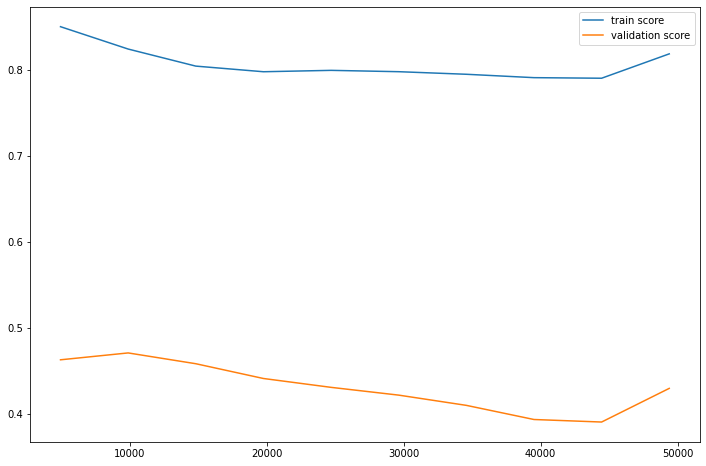

In [28]:
evaluation(model_1)

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[ 3229  9930]
 [ 1150 12009]]
              precision    recall  f1-score   support

           0       0.74      0.25      0.37     13159
           1       0.55      0.91      0.68     13159

    accuracy                           0.58     26318
   macro avg       0.64      0.58      0.53     26318
weighted avg       0.64      0.58      0.53     26318



/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/mael/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/home/mael/.pyenv/versions/3.7.6/e

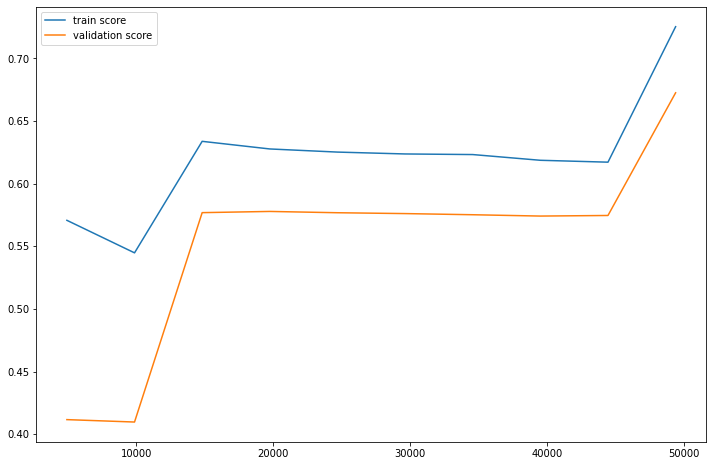

In [29]:
evaluation(model_2)

- **Model features importances**

In [30]:
pd.DataFrame(model.feature_importances_, index=X_train.columns)

,0
age,0.433563
sex_2,0.064176
patient_type_2,0.011347
intubed_2.0,0.019406
pneumonia_2.0,0.012036
pregnancy_2.0,0.005051
diabetes_2.0,0.053302
copd_2.0,0.016789
asthma_2.0,0.015962
inmsupr_2.0,0.011868


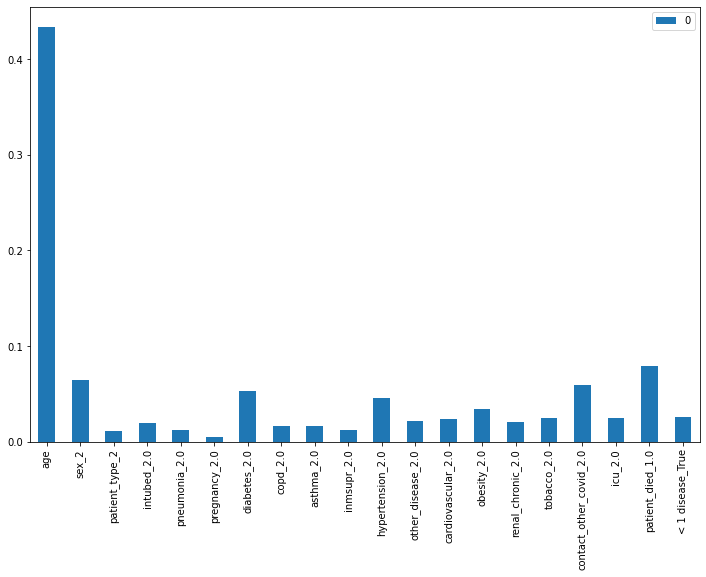

In [31]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))
plt.savefig('raw covid model decision tree feature_importances.png')

## 4 Modelisation Raw dataset "covid_pp_df"

**objective:** 

- establish a stategy to select the best classification model
- modelisation hyperparameters and regularisation tunning 


- Criteria 1: dataset shape (566602, 23), X_train shpae (65850, 20), X_test shape (26318, 20)
    - the dataset is less than 100000
- Criteria 2 Parametric/Non parametric models
    - in our case, we are going to use Non parametrics model:
        - Support Vector Machines
        - Decision trees
        - Random Forest
        - K-Nearest Neighbours
- Criteria 3 Variable quatitatives/categorical
    - due to all our varibles are categorical it will probably more suitable to use Decision trees models


## 4.1 Raw dataset "covid_pp_df" model selection

In [32]:
# preprocessing sub-pipeline
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             SelectKBest(f_classif,k=20))

In [33]:
#models pipelines
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())
LGB = make_pipeline(preprocessor,StandardScaler(), LGBMClassifier())

In [34]:
# model dictionary
dict_of_models = {'DecisionTree':DecisionTree,
                  'RandomForest': RandomForest,
                  'AdaBoost':AdaBoost,
                  'KNN':KNN,
                  'LGB':LGB
                 }

DecisionTree
[[ 3229  9930]
 [ 1129 12030]]
              precision    recall  f1-score   support

           0       0.74      0.25      0.37     13159
           1       0.55      0.91      0.69     13159

    accuracy                           0.58     26318
   macro avg       0.64      0.58      0.53     26318
weighted avg       0.64      0.58      0.53     26318

RandomForest
[[ 3091 10068]
 [ 1016 12143]]
              precision    recall  f1-score   support

           0       0.75      0.23      0.36     13159
           1       0.55      0.92      0.69     13159

    accuracy                           0.58     26318
   macro avg       0.65      0.58      0.52     26318
weighted avg       0.65      0.58      0.52     26318

AdaBoost
[[ 3734  9425]
 [ 1337 11822]]
              precision    recall  f1-score   support

           0       0.74      0.28      0.41     13159
           1       0.56      0.90      0.69     13159

    accuracy                           0.59     26318


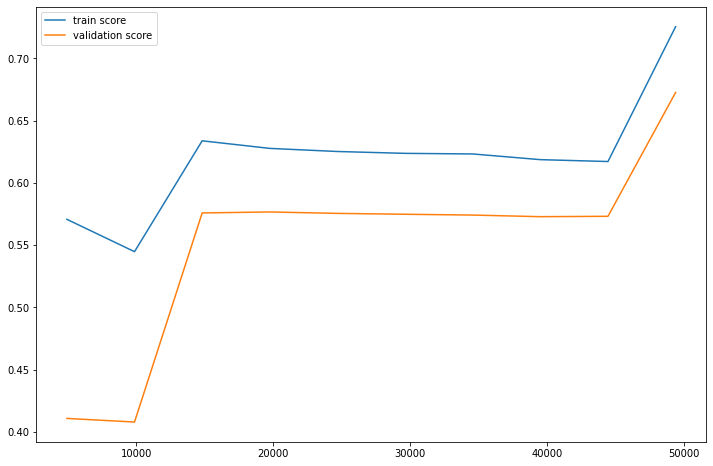

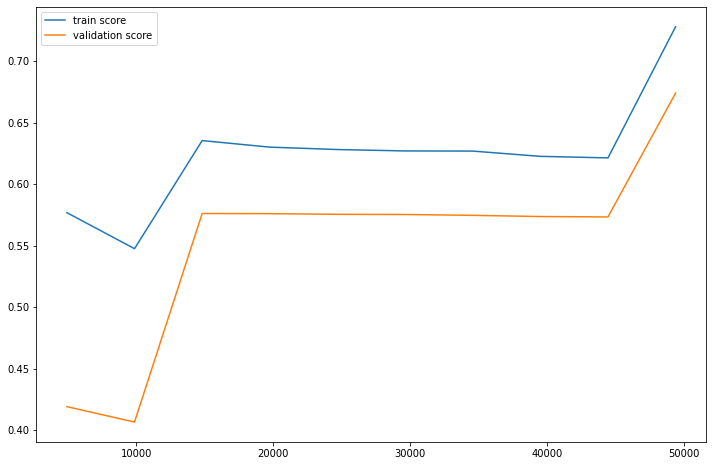

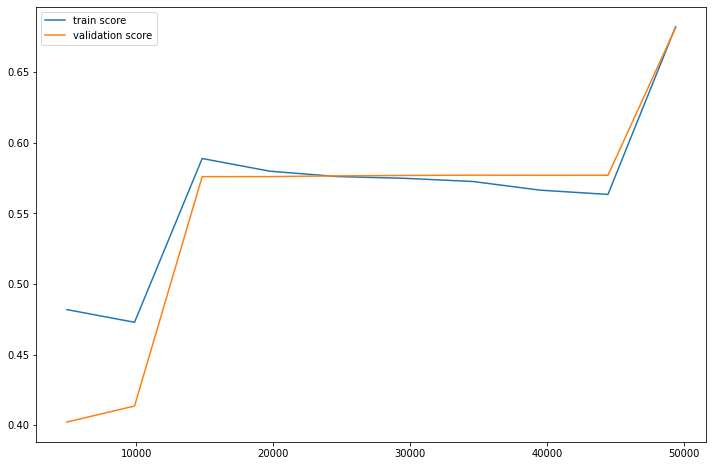

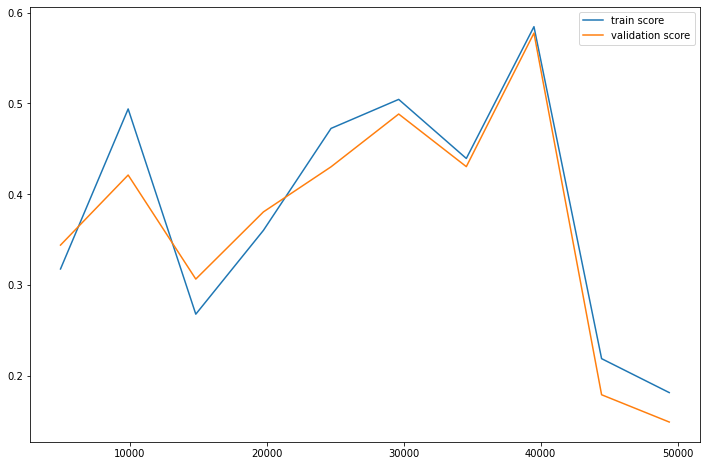

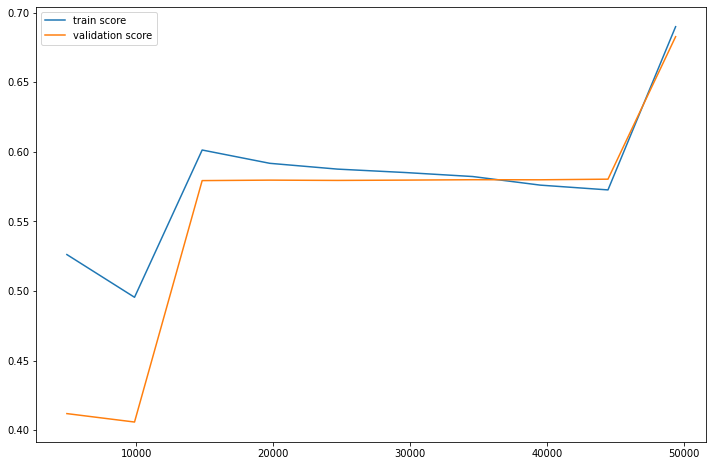

In [92]:
# models loop execution
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [35]:
# preprocessing sub-pipeline
preprocessor_2 = make_pipeline(SelectKBest(f_classif,k=20))

In [36]:
#models pipelines
DecisionTree_2 = make_pipeline(preprocessor_2,DecisionTreeClassifier(random_state=0))
RandomForest_2 = make_pipeline(preprocessor_2, RandomForestClassifier(random_state=0))
AdaBoost_2 = make_pipeline(preprocessor_2, AdaBoostClassifier(random_state=0))
SVM_2 = make_pipeline(preprocessor_2,StandardScaler(), SVC(random_state=0))
KNN_2 = make_pipeline(preprocessor_2,StandardScaler(), KNeighborsClassifier())
LGB_2 = make_pipeline(preprocessor_2,StandardScaler(),   LGBMClassifier())

In [37]:
# model dictionary
dict_of_models_2 = {'DecisionTree_2':DecisionTree_2,
                  'RandomForest_2': RandomForest_2,
                  'AdaBoost_2':AdaBoost_2,
                  'KNN_2':KNN_2,
                  'LGB_2':LGB_2
                 }

DecisionTree
[[ 3229  9930]
 [ 1129 12030]]
              precision    recall  f1-score   support

           0       0.74      0.25      0.37     13159
           1       0.55      0.91      0.69     13159

    accuracy                           0.58     26318
   macro avg       0.64      0.58      0.53     26318
weighted avg       0.64      0.58      0.53     26318

RandomForest
[[ 3091 10068]
 [ 1016 12143]]
              precision    recall  f1-score   support

           0       0.75      0.23      0.36     13159
           1       0.55      0.92      0.69     13159

    accuracy                           0.58     26318
   macro avg       0.65      0.58      0.52     26318
weighted avg       0.65      0.58      0.52     26318

AdaBoost
[[ 3734  9425]
 [ 1337 11822]]
              precision    recall  f1-score   support

           0       0.74      0.28      0.41     13159
           1       0.56      0.90      0.69     13159

    accuracy                           0.59     26318


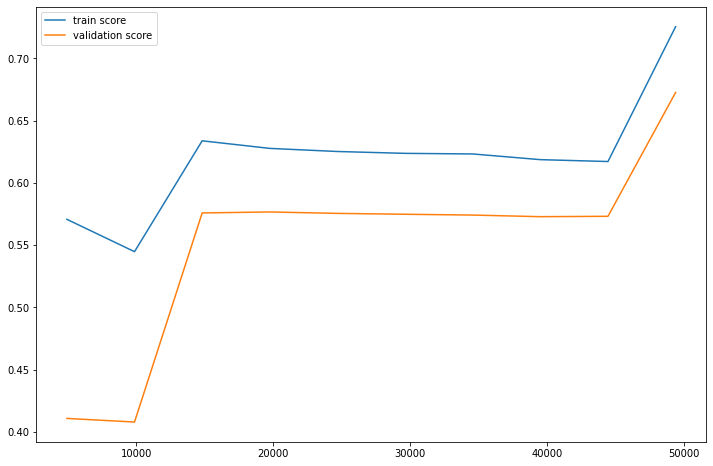

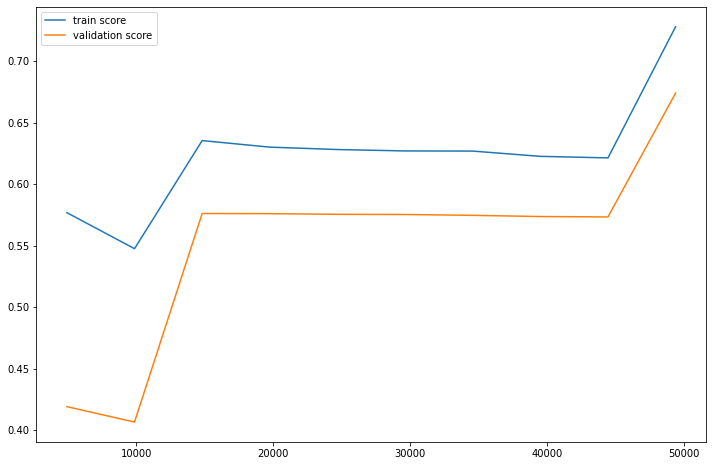

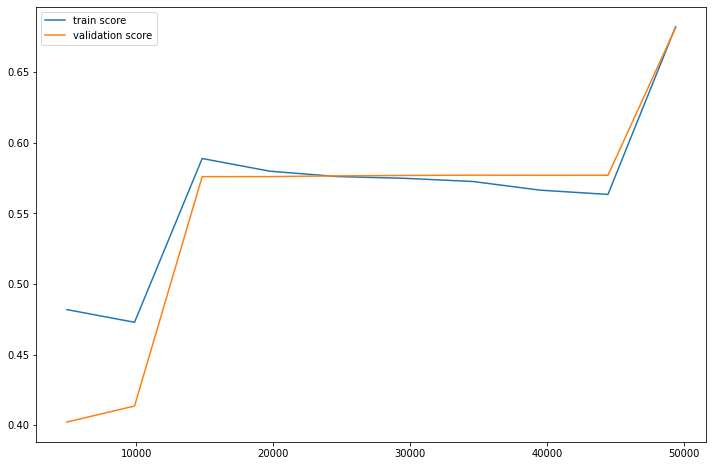

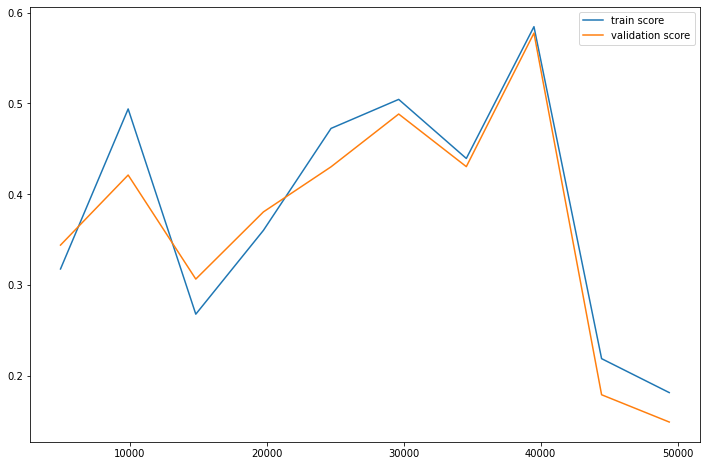

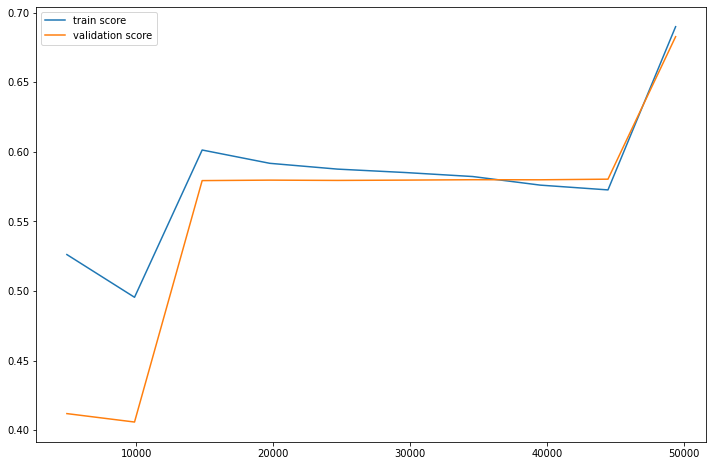

In [96]:
# models loop execution
for name, model in dict_of_models_2.items():
    print(name)
    evaluation(model)

## Raw dataset "covid_pp_df" model hyperparameters and regularisation tunning

In [58]:
hyper_params_DecisionTree_2 = {'decisiontreeclassifier__criterion':["gini", "entropy"],
                'decisiontreeclassifier__max_depth':np.arange(1, 100, 3),
                'decisiontreeclassifier__class_weight':[{0:100,1:1}, {0:10,1:1}, {0:50,1:1}],
                'decisiontreeclassifier__min_samples_leaf':np.arange(2, 9, 1),
                'pipeline__polynomialfeatures__degree':np.arange(1, 4, 1),
                'pipeline__selectkbest__k':np.arange(2, 21, 1)}

In [59]:
hyper_params_DecisionTree_2_2 = {'decisiontreeclassifier__criterion':["gini", "entropy"],
                'decisiontreeclassifier__max_depth':np.arange(1, 100, 3),
                'decisiontreeclassifier__class_weight':[{0:100,1:1}, {0:10,1:1}, {0:50,1:1}],
                'decisiontreeclassifier__min_samples_leaf':np.arange(2, 9, 1),
                'pipeline__selectkbest__k':np.arange(2, 21, 1)}
                

In [64]:
grid = RandomizedSearchCV(DecisionTree, hyper_params_DecisionTree_2, scoring='recall', cv=5, n_iter=100)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 15, 'pipeline__polynomialfeatures__degree': 1, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_depth': 46, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': {0: 10, 1: 1}}
              precision    recall  f1-score   support

           0       0.52      0.93      0.66     13159
           1       0.65      0.13      0.21     13159

    accuracy                           0.53     26318
   macro avg       0.58      0.53      0.44     26318
weighted avg       0.58      0.53      0.44     26318



[[11953  1206]
 [11062  2097]]
              precision    recall  f1-score   support

           0       0.52      0.91      0.66     13159
           1       0.63      0.16      0.25     13159

    accuracy                           0.53     26318
   macro avg       0.58      0.53      0.46     26318
weighted avg       0.58      0.53      0.46     26318



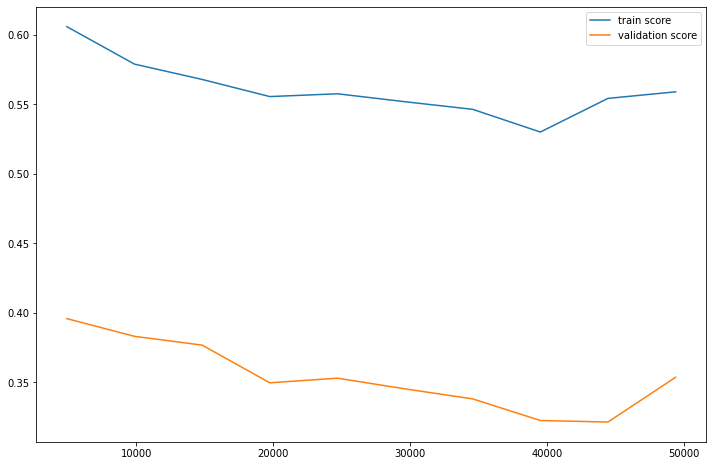

In [66]:
evaluation(grid.best_estimator_)

In [65]:
grid = RandomizedSearchCV(DecisionTree_2, hyper_params_DecisionTree_2_2, scoring='recall', cv=5, n_iter=100)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 19, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_depth': 61, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__class_weight': {0: 100, 1: 1}}
              precision    recall  f1-score   support

           0       0.52      0.91      0.66     13159
           1       0.63      0.16      0.25     13159

    accuracy                           0.53     26318
   macro avg       0.58      0.53      0.46     26318
weighted avg       0.58      0.53      0.46     26318



[[11953  1206]
 [11062  2097]]
              precision    recall  f1-score   support

           0       0.52      0.91      0.66     13159
           1       0.63      0.16      0.25     13159

    accuracy                           0.53     26318
   macro avg       0.58      0.53      0.46     26318
weighted avg       0.58      0.53      0.46     26318



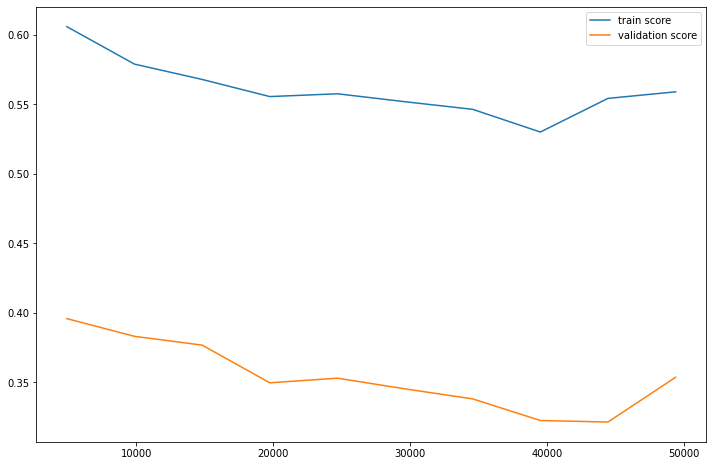

In [67]:
evaluation(grid.best_estimator_)

grid = RandomizedSearchCV(LGB, hyper_params_AdaBoost, scoring='recall', cv=10, n_iter=100, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

## 5 Conclusion modelisation raw dataset "covid_pp_df"

**objective:** 

Metrics targeted:
- F1 => 50%<br>
- Recall => 70%<br>

we reach our taget modelisation on "covid_res_2" => 0 with the decision tree estimator